In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [9]:
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [10]:
df = df[df['RestingBP'] != 0]

In [11]:
df = df.reset_index(drop= True)

In [12]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
913,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
914,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
915,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [13]:
(df['Cholesterol'] == 0).sum()


171

In [14]:
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)

In [15]:
df['Cholesterol'].isna().sum()

171

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
imputer = SimpleImputer(strategy= 'median')
df['Cholesterol'] = imputer.fit_transform(df[['Cholesterol']])

In [18]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,243.211559,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.430044,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='HeartDisease', ylabel='count'>

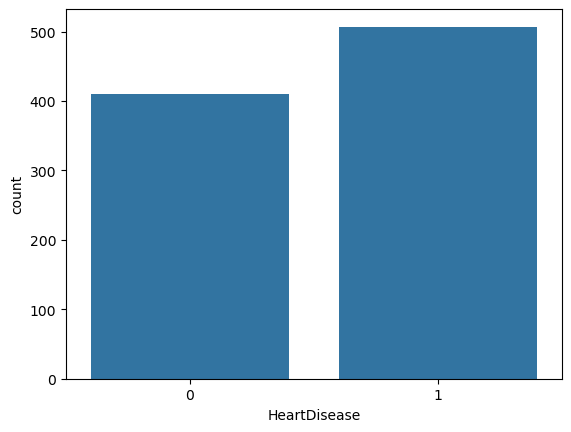

In [19]:
sns.countplot(x = df['HeartDisease'])

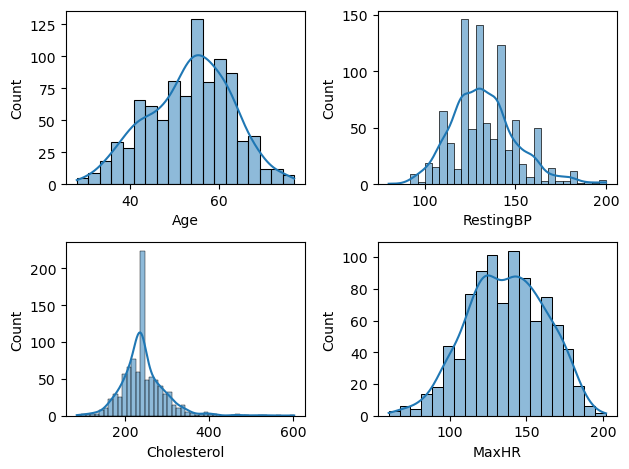

In [20]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)


plt.tight_layout()

In [21]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


<Axes: >

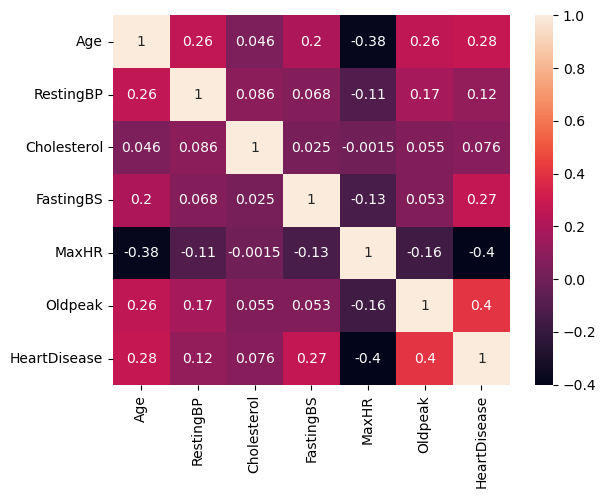

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [23]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,243.211559,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.430044,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [24]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [25]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat
913,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat
914,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat
915,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat


In [26]:
df['ExerciseAngina'] = df['ExerciseAngina'].replace('N', False)
df['ExerciseAngina'] = df['ExerciseAngina'].replace('Y', True)

C:\Users\jayjo\AppData\Local\Temp\ipykernel_15880\958682633.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ExerciseAngina'] = df['ExerciseAngina'].replace('Y', True)


In [27]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,False,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,False,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,False,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,True,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,False,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264.0,0,Normal,132,False,1.2,Flat,1
913,68,M,ASY,144,193.0,1,Normal,141,False,3.4,Flat,1
914,57,M,ASY,130,131.0,0,Normal,115,True,1.2,Flat,1
915,57,F,ATA,130,236.0,0,LVH,174,False,0.0,Flat,1


In [28]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat
913,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat
914,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat
915,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat


In [29]:
X['ExerciseAngina'] = X['ExerciseAngina'].replace('N', False)
X['ExerciseAngina'] = X['ExerciseAngina'].replace('Y', True)

C:\Users\jayjo\AppData\Local\Temp\ipykernel_15880\3077509084.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['ExerciseAngina'] = X['ExerciseAngina'].replace('Y', True)


In [30]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289.0,0,Normal,172,False,0.0,Up
1,49,F,NAP,160,180.0,0,Normal,156,False,1.0,Flat
2,37,M,ATA,130,283.0,0,ST,98,False,0.0,Up
3,48,F,ASY,138,214.0,0,Normal,108,True,1.5,Flat
4,54,M,NAP,150,195.0,0,Normal,122,False,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264.0,0,Normal,132,False,1.2,Flat
913,68,M,ASY,144,193.0,1,Normal,141,False,3.4,Flat
914,57,M,ASY,130,131.0,0,Normal,115,True,1.2,Flat
915,57,F,ATA,130,236.0,0,LVH,174,False,0.0,Flat


In [31]:
y

0      0
1      1
2      0
3      1
4      0
      ..
912    1
913    1
914    1
915    1
916    0
Name: HeartDisease, Length: 917, dtype: int64

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    object 
 2   ChestPainType   917 non-null    object 
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    object 
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    bool   
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 72.7+ KB


In [33]:
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
bin_cols = ['FastingBS','ExerciseAngina'] 
cat_cols = ['Sex','ChestPainType','RestingECG','ST_Slope']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [35]:
X['ExerciseAngina'] = X['ExerciseAngina'].astype(int)

In [36]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289.0,0,Normal,172,0,0.0,Up
1,49,F,NAP,160,180.0,0,Normal,156,0,1.0,Flat
2,37,M,ATA,130,283.0,0,ST,98,0,0.0,Up
3,48,F,ASY,138,214.0,0,Normal,108,1,1.5,Flat
4,54,M,NAP,150,195.0,0,Normal,122,0,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
912,45,M,TA,110,264.0,0,Normal,132,0,1.2,Flat
913,68,M,ASY,144,193.0,1,Normal,141,0,3.4,Flat
914,57,M,ASY,130,131.0,0,Normal,115,1,1.2,Flat
915,57,F,ATA,130,236.0,0,LVH,174,0,0.0,Flat


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42) 

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('bin', 'passthrough', bin_cols)
    ]
)


In [39]:
X_train_pross = preprocessor.fit_transform(X_train)
X_test_pross = preprocessor.transform(X_test)

In [40]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True)
}

In [42]:
results = []

In [43]:
from scipy.sparse import issparse

In [44]:
issparse(X_test_pross)

False

In [45]:
for name, model in models.items():
    model.fit(X_train_pross, y_train)
    y_pred = model.predict(X_test_pross)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })

In [46]:
results

[{'Model': 'Logistic Regression', 'Accuracy': 0.8859, 'F1 Score': 0.8976},
 {'Model': 'KNN', 'Accuracy': 0.8587, 'F1 Score': 0.8725},
 {'Model': 'Naive Bayes', 'Accuracy': 0.8913, 'F1 Score': 0.901},
 {'Model': 'Decision Tree', 'Accuracy': 0.7772, 'F1 Score': 0.8019},
 {'Model': 'SVM (RBF Kernel)', 'Accuracy': 0.8859, 'F1 Score': 0.8976}]

In [47]:
feature_names = preprocessor.get_feature_names_out()

In [48]:
X_view = pd.DataFrame(X_train_pross,columns=feature_names,index = X_train.index)

In [49]:
X_view

,num__Age,num__RestingBP,num__Cholesterol,num__MaxHR,num__Oldpeak,cat__Sex_M,cat__ChestPainType_ATA,cat__ChestPainType_NAP,cat__ChestPainType_TA,cat__RestingECG_Normal,cat__RestingECG_ST,cat__ST_Slope_Flat,cat__ST_Slope_Up,bin__FastingBS,bin__ExerciseAngina
161,-0.504752,-0.271661,-0.599406,-1.590143,-0.813322,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
603,1.505450,0.055941,0.178329,0.557626,-0.813322,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
658,0.553249,-0.380862,-0.488301,-0.106230,1.244032,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
792,1.399650,-0.435463,0.178329,1.026231,-0.626290,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
140,-0.187351,1.475552,1.604176,-1.668244,1.524581,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,-0.293151,0.110542,-1.562316,0.518576,1.057000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
201,-0.822152,-0.708465,-0.266091,0.518576,-0.813322,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
463,0.553249,-0.107860,-0.136469,-0.340532,1.057000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
252,0.764850,-0.435463,0.881993,-0.848187,-0.813322,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [50]:
import joblib
joblib.dump(models['Naive Bayes'],"heart_naive_bayes_model.pkl")
joblib.dump(preprocessor, "heart_preprocessor.pkl")


['heart_preprocessor.pkl']

In [51]:
import sklearn
print(sklearn.__version__)


1.8.0
